Gold Price Prediction Dataset -> https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data/discussion/445497

Importing Dependencies

---
In this Project i Using Two Regression model to prediction


1.Linear_Regression


2.Random_forest Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Load the Dataset 🔗

In [3]:
#loading gold price dataset
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#printing first 5 rows in dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#shape of dataframe
gold_data.shape

(2290, 6)

In [6]:
#counting null values in dataframe
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


Data Analyse and visualization

In [7]:
#get the statistics about dataframe
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#correlation on gold dataframe
correlation = gold_data.drop(columns='Date',axis=1).corr()

<Axes: >

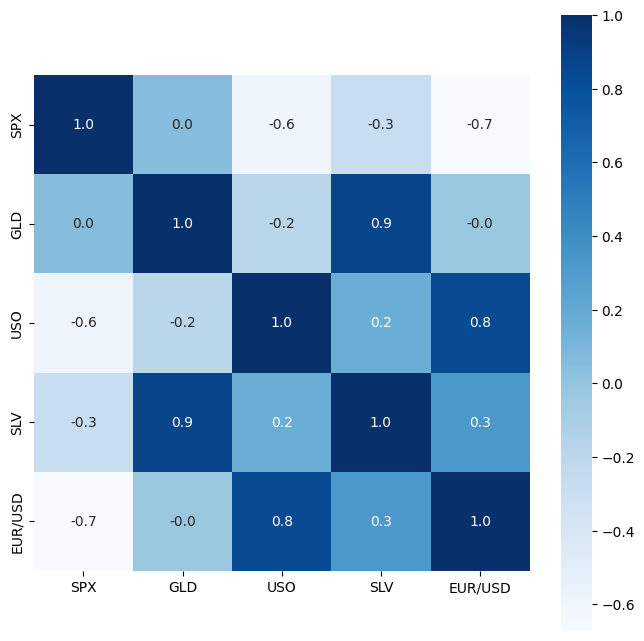

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

/tmp/ipython-input-3654138520.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green',)


<Axes: xlabel='GLD', ylabel='Density'>

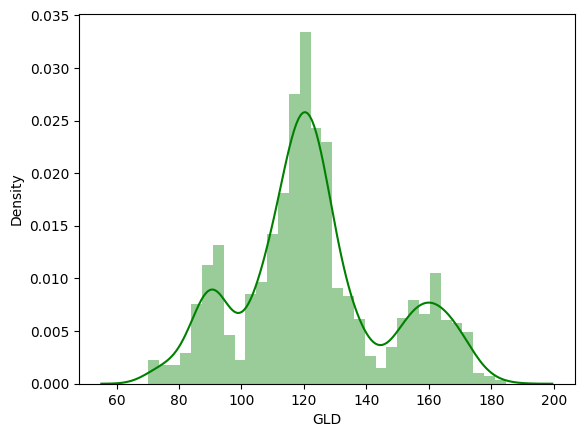

In [16]:
#gold price distribution
sns.distplot(gold_data['GLD'],color='green',)

Seperate label and features

In [17]:
X = gold_data.drop(columns=['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting Training and test Data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Fitting

---

Linear Regression Model

RandomForest Regression Model


In [20]:
#linear Regression Model fit
lr_model = LinearRegression()
rfr_model = RandomForestRegressor()

In [21]:
#Linear Model Fit
lr_model.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [32]:
#Linear Model Testing Data Accuracy
test_data_prediction = lr_model.predict(X_test)
test_data_r2 = metrics.r2_score(y_test,test_data_prediction)
print('R Squared Score: ',test_data_r2)

R Squared Score:  0.8657886565869237


RandomForest Model Evaluation

In [33]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
#randomforest Model Testing Data Accuracy
test_data_prediction_rfr = rfr_model.predict(X_test)
test_data_r2_rfr = metrics.r2_score(y_test,test_data_prediction_rfr)
print('R Squared Score: ',test_data_r2_rfr)

R Squared Score:  0.9892160088721877


Test Data Visualization


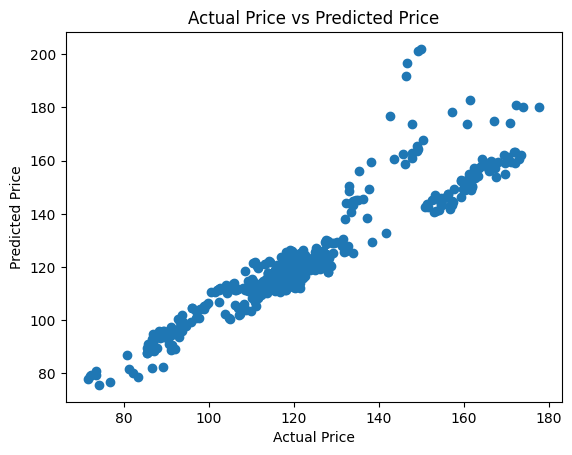

In [35]:
#linear regression predicted value vs actual value
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

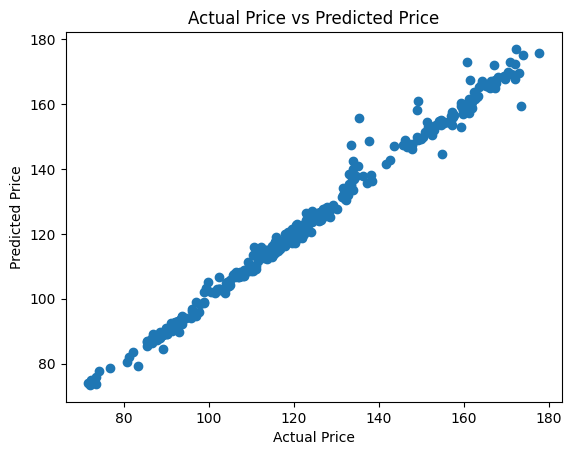

In [37]:
#RandomForestREgression predicted value vs actual value
#linear regression predicted value vs actual value
plt.scatter(y_test,test_data_prediction_rfr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()



---



Model Prediction Testing

In [31]:
models = [lr_model,rfr_model]

#input field to get input
input_data = (1380.02002,78.919998,19.132999,1.511807)

#convert into array
input_data_array = np.asarray(input_data)

#reshape
input_data_reshape = input_data_array.reshape(1,-1)

#model prediction
for model in models:
  prediction = model.predict(input_data_reshape)
  print(str(model)," Prediction: ",prediction)


LinearRegression()  Prediction:  [103.79897924]
RandomForestRegressor()  Prediction:  [95.04119933]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model Saving

In [38]:
import pickle

with open('gold_price_model_linearRegresion.pkl','wb') as file:
  pickle.dump(lr_model,file)

with open('gold_price_model_randomForest.pkl','wb') as file:
  pickle.dump(rfr_model,file)